In [6]:
"""
1.&2.Generate data and compute w
"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
import math

def actual_distribution():        # generate points using given function
    x = np.arange(0, 1.0, 0.05);  
    y = np.sin(np.power(x, 2) + 1)
    return x, y

def add_noise(y_curve):      # add Guassian random noise;mu = 0, sigma=0.06
    mu = 0
    sigma = 0.04
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

def fitting_true_data(x):  # fit the true data
    y = np.sin(np.power(x, 2) + 1)
    return y

def Full_Bayesian_function(x, y, M, s, a, beta):  # Full_Bayesian using basis function
    N = len(x)
    fai = np.zeros([N, M])
    mu = [0] * M
    d = 1.0/M
    hyperm = np.identity(M)
    
    for m in range(1, M):
        mu[m] += d * m
        
    for n in range(N):
        fai[n][0] = 1
        
    for n in range(N):
        for m in range(1, M):
            fai[n][m] = math.exp((-(x[n]-mu[m])**2)/(2*s**2))
    
    tmp = linalg.pinv(a*hyperm + beta * np.dot(fai.T, fai))
    tm = beta * np.dot(tmp, fai.T)
    w = np.dot(tm, y)
    return w, fai

def my_plot(x, fai, w):  # plot the curve of full Bayesian prediction
    N = len(x)
    y = np.dot(fai, w)
    return x, y

#= = = = = = = = = = = = = =
# generate true data
x_true, y_true = actual_distribution()

#fit on the actual data
x_curve = np.linspace(x_true[0], x_true[-1], 50) #50 points
y_curve = fitting_true_data(x_curve)

# add noise on the true data
y_noise = add_noise(y_curve)
x_noise = x_curve

#estimate the curve from noisy data
w, fai = Full_Bayesian_function(x_noise, y_noise, M=4,s=0.2,a=0.02,beta=1.0) 
[x_est, y_est] = my_plot(x_curve, fai, w)

# show w
print('w:', w)

w: [0.80815124 0.05741992 0.01581462 0.19251831]


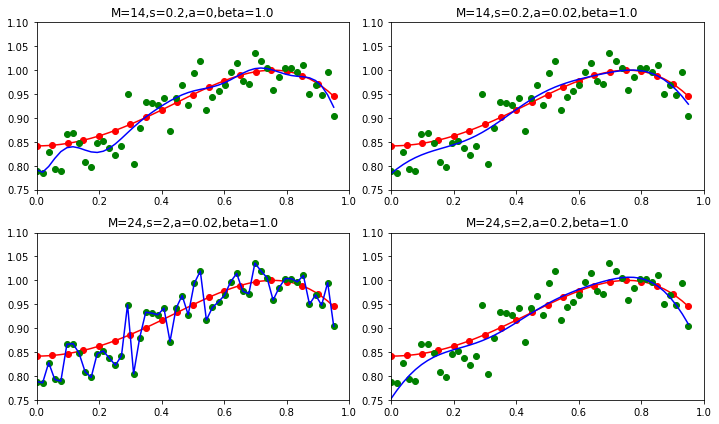

In [248]:
"""
3.changing a and beta
"""
# changing a;overfitting problem
fig = plt.figure(figsize=(10,6))
#a = 0
ax1 = fig.add_subplot(2,2,1)
w, fai = Full_Bayesian_function(x_noise, y_noise, M=14,s=0.2,a=0,beta=1.0) 
[x_est, y_est] = my_plot(x_curve, fai, w)
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue') # Full Bayesian curve
plt.xlim(0, 1)
plt.ylim(0.75, 1.10)
ax1.set_title('M=14,s=0.2,a=0,beta=1.0')
#a=0.02
ax2 = fig.add_subplot(2,2,2)
w, fai = Full_Bayesian_function(x_noise, y_noise, M=14,s=0.2,a=0.02,beta=1.0) 
[x_est, y_est] = my_plot(x_curve, fai, w)
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue') # Full Bayesian curve
plt.xlim(0, 1)
plt.ylim(0.75, 1.10)
ax2.set_title('M=14,s=0.2,a=0.02,beta=1.0')
#a=0.02, M=24
ax3 = fig.add_subplot(2,2,3)
w, fai = Full_Bayesian_function(x_noise, y_noise, M=60,s=0.01,a=0,beta=1.0) 
[x_est, y_est] = my_plot(x_curve, fai, w)
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue') # Full Bayesian curve
plt.xlim(0, 1)
plt.ylim(0.75, 1.10)
ax3.set_title('M=24,s=2,a=0.02,beta=1.0')
# M=24,a=0.2
ax4 = fig.add_subplot(2,2,4)
w, fai = Full_Bayesian_function(x_noise, y_noise, M=24,s=0.2,a=0.2,beta=1.0) 
[x_est, y_est] = my_plot(x_curve, fai, w)
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue') # Full Bayesian curve
plt.xlim(0, 1)
plt.ylim(0.75, 1.10)
ax4.set_title('M=24,s=2,a=0.2,beta=1.0')
# show the plot
fig.tight_layout(h_pad=1)
plt.show()

In [ ]:
"""
Meaning of a: according to the definition, prior is assumed to be a Guassian function with covariance a, it is 
actually the standard deviation of w's distribution which can ease the overfitting problem to some degree. As 
shown in the figure above, when M=14,a=0, which means remove a from the fitting function, an overfitting problem 
arises and then setting a=0.02, the curve fits the data better, which implies a can reduce overfitting. However, 
0.02 is not enough for M=24, a more severe overfitting(shown in subplot3), then if we increase a to 0.2, the 
overfitting problem can be reduced.(shown in subplot4)

"""

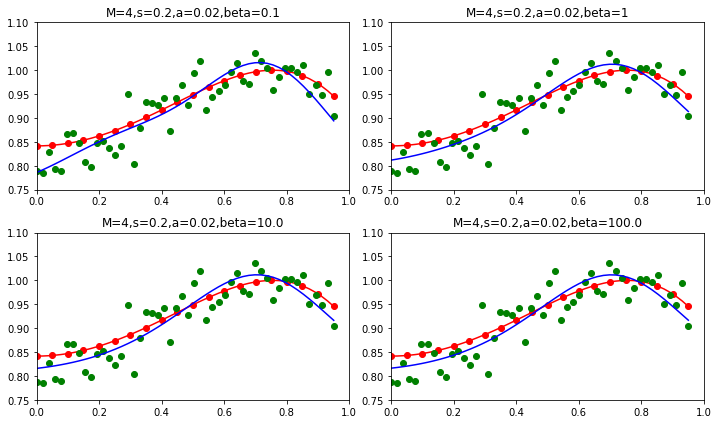

In [250]:
# changing beta
fig = plt.figure(figsize=(10,6))
#beta=0.1
ax1 = fig.add_subplot(2,2,1)
w, fai = Full_Bayesian_function(x_noise, y_noise, M=4,s=0.2,a=0.02,beta=0.1) 
[x_est, y_est] = my_plot(x_curve, fai, w)
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue') # Full Bayesian curve
plt.xlim(0, 1)
plt.ylim(0.75, 1.10)
ax1.set_title('M=4,s=0.2,a=0.02,beta=0.1')
#beta=1
ax2 = fig.add_subplot(2,2,2)
w, fai = Full_Bayesian_function(x_noise, y_noise, M=4,s=0.2,a=0.02,beta=1) 
[x_est, y_est] = my_plot(x_curve, fai, w)
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue') # Full Bayesian curve
plt.xlim(0, 1)
plt.ylim(0.75, 1.10)
ax2.set_title('M=4,s=0.2,a=0.02,beta=1')
#beta=10.0
ax3 = fig.add_subplot(2,2,3)
w, fai = Full_Bayesian_function(x_noise, y_noise, M=4,s=0.2,a=0.02,beta=10.0) 
[x_est, y_est] = my_plot(x_curve, fai, w)
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue') # Full Bayesian curve
plt.xlim(0, 1)
plt.ylim(0.75, 1.10)
ax3.set_title('M=4,s=0.2,a=0.02,beta=10.0')
#beta=100.0
ax4 = fig.add_subplot(2,2,4)
w, fai = Full_Bayesian_function(x_noise, y_noise, M=4,s=0.2,a=0.02,beta=100.0) 
[x_est, y_est] = my_plot(x_curve, fai, w)
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue') # Full Bayesian curve
plt.xlim(0, 1)
plt.ylim(0.75, 1.10)
ax4.set_title('M=4,s=0.2,a=0.02,beta=100.0')
# show the plot
fig.tight_layout(h_pad=1)
plt.show()

In [ ]:
"""
Meaning of beta:according to definition, beta is the variance of likelihood, which indicates the uncertainty. 
It is the standard deviation of noisy. By changing beta, (from 0.1 to 100.0 in figure above),the curve dose not
show significant change. So beta not indicates uncertainty for p(w).
"""

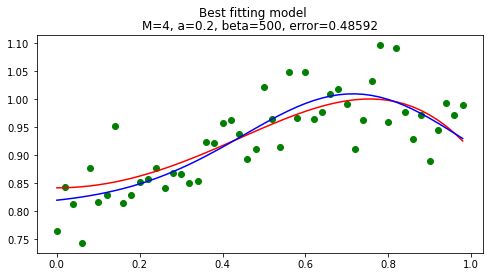

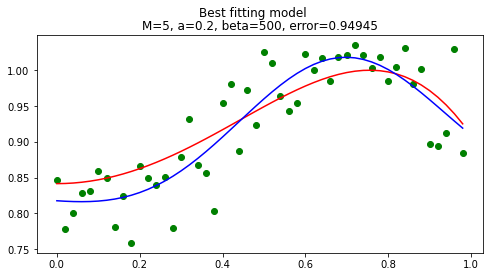

In [5]:
"""
4.best fitting curve
"""
x = np.arange(0, 1, 0.02)
y = np.sin(np.power(x, 2) + 1)

def gaussian_basis(x:np.ndarray, mu:float, s:float=1):
    return np.exp(- np.linalg.norm(x-mu)**2 / (2 * s**2))

def Full_basis(x, y_noisy, model_m, alpha):
    # Create an empty matrix
    Phi = np.ones((len(x), model_m))
    sigma = 1/model_m
    BETA = sigma ** (-2)
    # First column is 1. other column apply gaussian basis function
    for m in range(1,model_m):
        mu = m/model_m
        Phi[:,m] = np.vectorize(gaussian_basis)(x, mu, sigma)

    #Apply the above formular
    t = y_noisy.reshape(len(x),1)
    w = np.linalg.inv(Phi.T @ Phi + (alpha/BETA)*np.identity(model_m)) @ Phi.T @ t
    return w, Phi

# absolute error
def basis_error(fai, w, y):
    y_est = fai @ w
    return float(np.sum(np.abs(y.reshape(50,1)-y_est))), y_est

# Calculate Gaussian probability
def p_w_t(w, mn, s):
    dim = len(w)
    temp = (2*math.pi)**(-dim/2)
    tmp = np.power(np.linalg.det(s),-0.5)
    tp = np.exp(-0.5*(w-mn).T @ np.linalg.inv(s) @ (w-mn))
    Gaussian = temp*tmp*tp
    return Gaussian

def plt_alpha_beta(alpha_list, beta_list, x, y, m):
    # Create some empty lists to record our results
    w_list = []
    phi_list = []
    y_est_list = []
    error_list = []
    y_noisy_list = []
    # Full Bayesian parameter
    prob_list = []
    for alpha, beta in zip(alpha_list, beta_list):
        # Calculate noise and y_noisy
        sigma = beta**(-0.5)
        noise = np.random.normal(0,sigma,size=(50))
        y_noisy = y+noise
        y_noisy_list.append(y_noisy)
        # Calculate w
        tmp_w, tmp_Phi = Full_basis(x, y_noisy, m,alpha)
        w_list.append(tmp_w)
        phi_list.append(tmp_Phi)
        # Calculate y estimation and absolut error
        tmp_error, tmp_y_est = basis_error(tmp_Phi, tmp_w, y)
        error_list.append(tmp_error)
        y_est_list.append(tmp_y_est)
        # Calculate Full Bayesian parameter
        tmp_S = np.linalg.inv(alpha*np.identity(m) + beta*tmp_Phi.T @ tmp_Phi)
        tmp_m = beta * tmp_S @ tmp_Phi.T @ y_noisy.reshape(len(x),1)
        tmp_prob = p_w_t(tmp_w, tmp_m, tmp_S)
        prob_list.append(tmp_prob)

    fig = plt.figure(figsize =(8, 4))
    ax = plt.axes()
    best_index = np.argmax(prob_list)
    ax.set_title(f'M={m}, a={alpha_list[best_index]}, beta={beta_list[best_index]}, error={round(error_list[best_index],5)}')
    ax.plot(x, y, 'r-')
    ax.scatter(x, y_noisy_list[best_index],color='green')
    ax.plot(x, y_est_list[best_index], 'b-')
    fig.suptitle(f'Best fitting model')
    
#====== === == === ==== == == 
alphalist = [0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.3, 0.4, 0.5, 0.6]
betalist = [50, 100, 200, 400, 500, 400, 400, 400]

# best fitting model for M=4 and M=5
plt_alpha_beta(alphalist, betalist,x,y, 4)    
plt_alpha_beta(alphalist, betalist,x,y, 5)    

In [ ]:
"""
5.Explain how useful p(w|t) for the training and testing stages:
For training stages, p(w|t) is what we want to obtain and through
finding the maxinmum of p(w|t), we compute w and then predict the
curve.
For testing stages, we use p(w|t) to compute p(tnew|t) and estimate
how good the tnew is.
"""

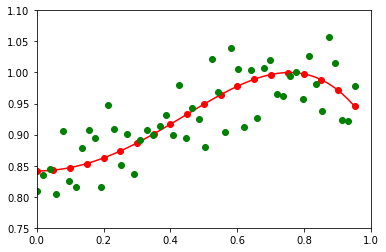

In [6]:
"""
6.Generate data and add noise
"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
import math

def actual_distribution():        # generate points using given function
    x = np.arange(0, 1.0, 0.05);  
    y = np.sin(np.power(x, 2) + 1)
    return x, y

def add_noise(y_curve):      # add Guassian random noise;mu = 0, sigma=0.06
    mu = 0
    sigma = 0.05
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

def fitting_true_data(x):  # fit the true data
    y = np.sin(np.power(x, 2) + 1)
    return y

# = = = = = = == = = = 
# generate true data
x_true, y_true = actual_distribution()

#fit on the actual data
x_curve = np.linspace(x_true[0], x_true[-1], 50) #50 points
y_curve = fitting_true_data(x_curve)
# add noise on the true data
y_noise = add_noise(y_curve)
x_noise = x_curve

# show the plot
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.xlim(0, 1)
plt.ylim(0.75, 1.10)
plt.show()

Sample index:[35, 25, 4, 28, 41, 38, 1, 49, 16, 46, 47, 0, 17, 11, 5, 26, 20, 12, 32, 23, 21, 31, 18, 33, 40, 9, 48, 45, 3, 2, 42, 43, 22, 14, 15, 6, 24, 30, 10, 44, 37, 7, 8, 13, 34, 39, 27, 29, 36, 19]


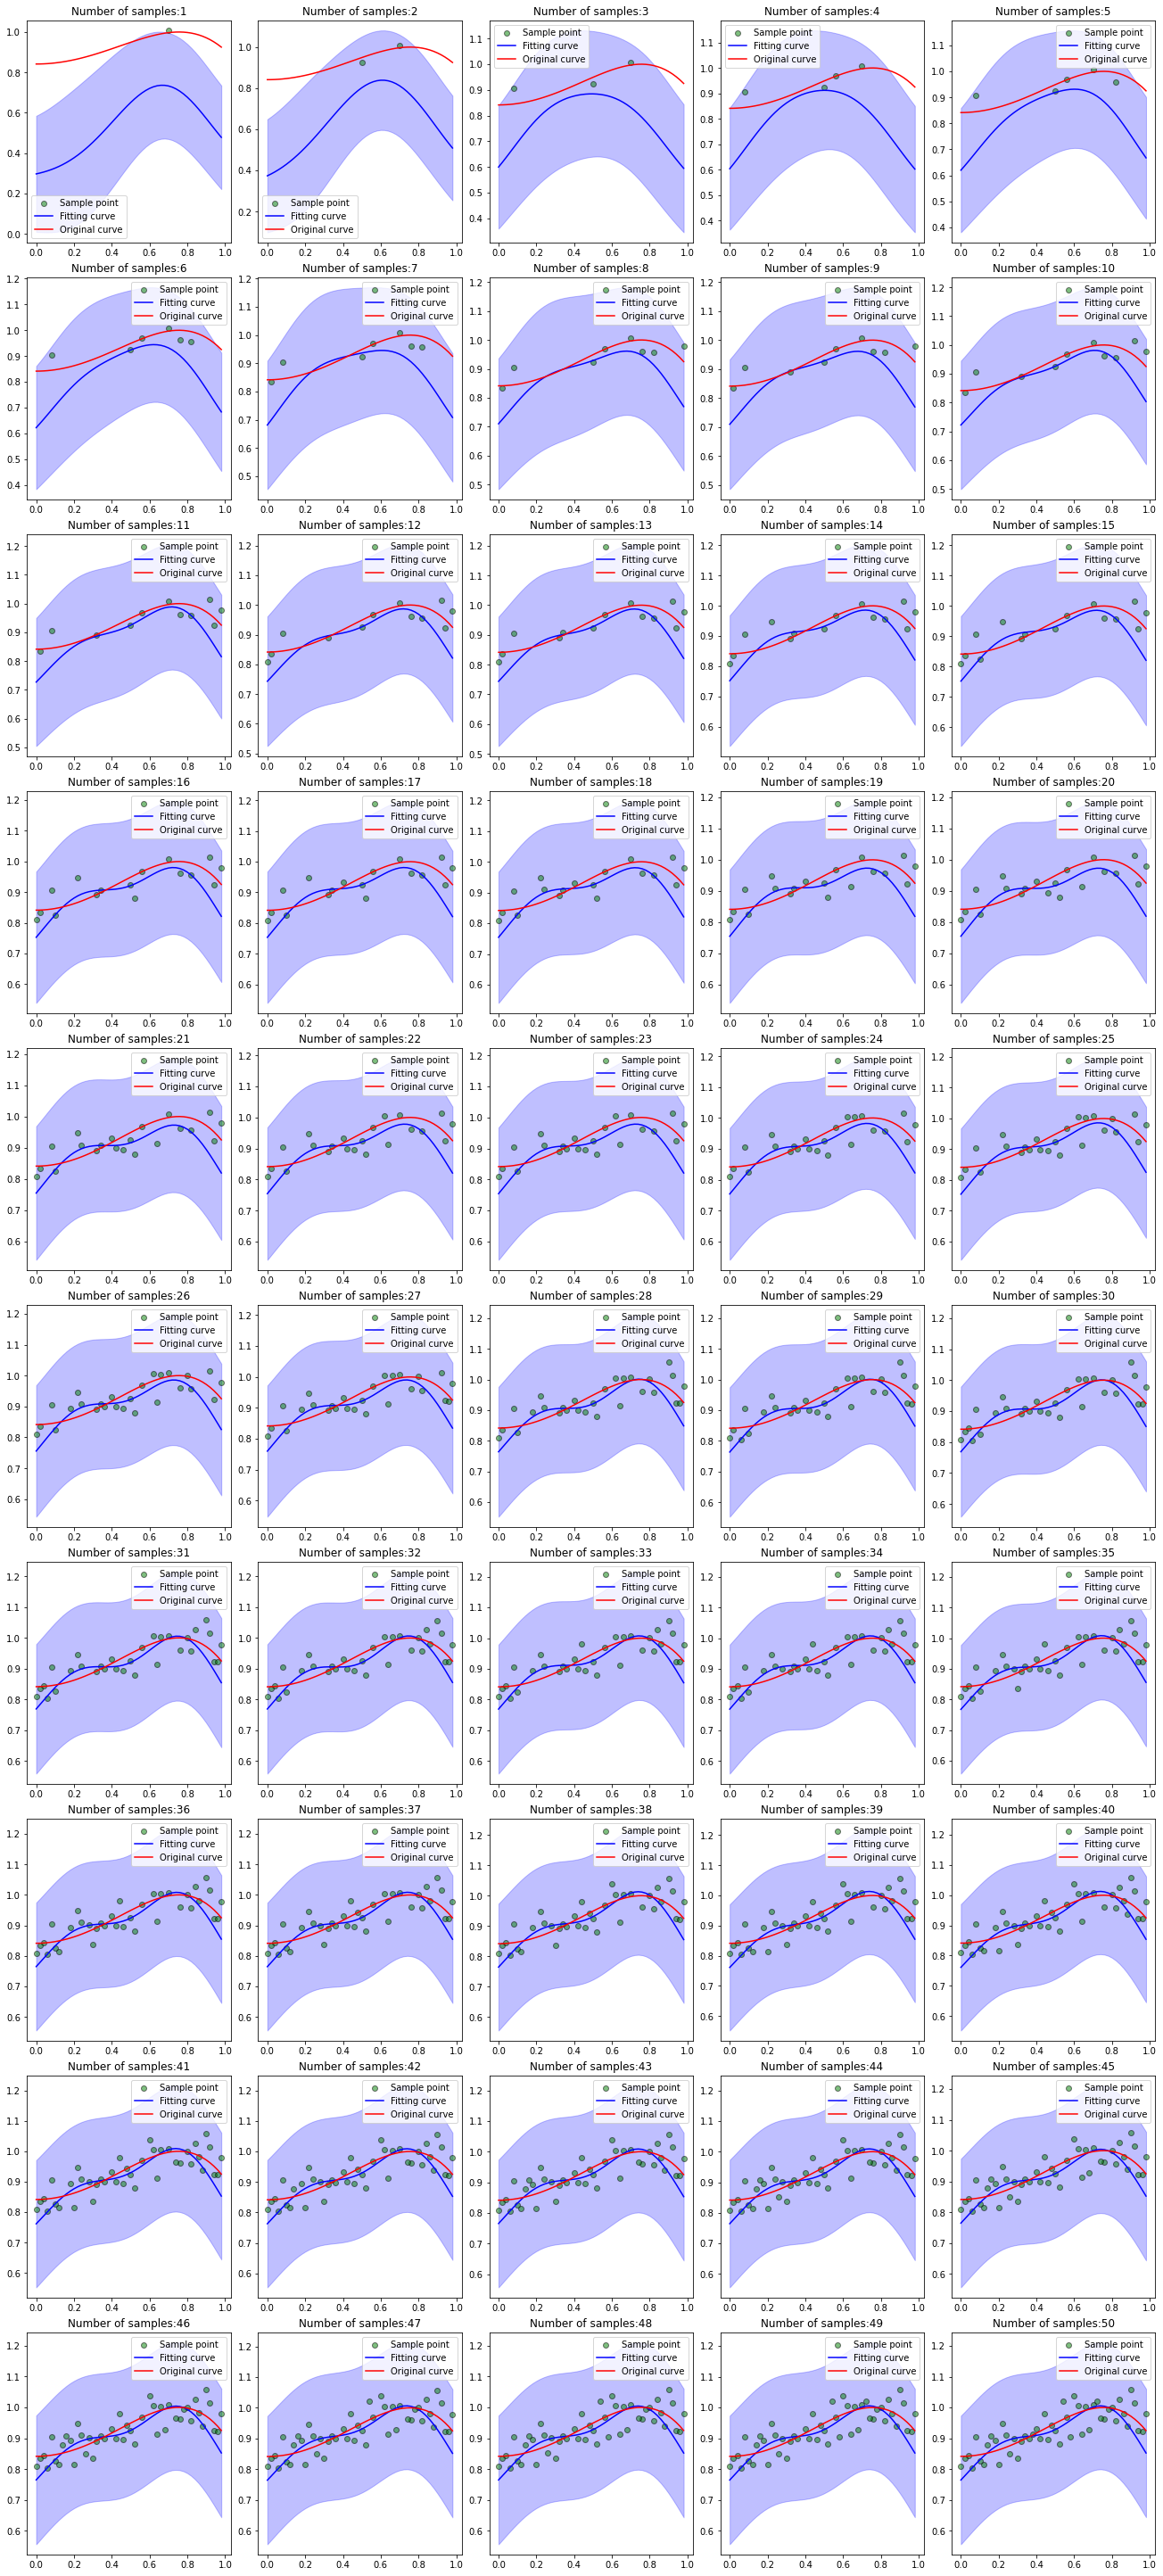

In [23]:
"""
7. Predictive distribution
"""
# Compute S_N and m_N
def Compute_Sn_Mn(x:np.ndarray, y:np.ndarray, sigma: float, model_m:int) -> tuple[np.ndarray, np.ndarray]:
    phi = np.ones((len(x),model_m))
    alpha = sigma ** (-2)
    for i in range(1,model_m):
        mu = i/model_m
        phi[:,i] = np.vectorize(gaussian_basis)(x, mu, sigma)
    s_n = np.linalg.inv(alpha*np.eye(model_m) + BETA*phi.T @ phi)
    m_n = BETA * s_n @ phi.T @ y.reshape(len(x),1)
    return s_n, m_n

# Compute mu and sig for samples
def Compute_mu_sig(phi:np.ndarray, s_n:np.ndarray, m_n:np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    pred = phi@m_n
    pred = pred.flatten()
    cov_mat = BETA ** (-1) * np.eye(phi.shape[0]) + phi@s_n@phi.T
    sig = np.sqrt(cov_mat.diagonal())
    return pred, sig


# predictive distribution
def predictive_distribution(x, y, y_noise, m, sigma):
    x_sam = []
    y_sam = []
    index_list=[]
    # Get samples randomly
    x_index = random.sample(range(len(x)),len(x))
    # Generate fai(Phi here in case of confusing with fai for other questions)
    Phi = np.ones((len(x),m))
    for i in range(1,m):
        mu = i/m
        Phi[:,i] = np.vectorize(gaussian_basis)(x, mu, sigma)
    # 50 figures for sample numbers 1 to 50
    fig, axs = plt.subplots(10,5, figsize=(18,40), constrained_layout=True)
    for ax, i in zip(axs.flatten(), x_index):
        x_sam.append(x[i])
        y_sam.append(y_noise[i])
        s_n, m_n = Compute_Sn_Mn(np.array(x_sam),np.array(y_sam), sigma, m)
        prediction, sig = Compute_mu_sig(Phi, s_n, m_n)
        ax.fill_between(x, prediction - sig, prediction + sig, color = 'blue', alpha = 0.25)  # 1-sigma region
        ax.scatter(x_sam,y_sam, marker = 'o', alpha = 0.5, edgecolor = 'k', facecolor ='green', label='Sample point')
        ax.plot(x, prediction, color ='blue', label = 'Fitting curve')
        ax.plot(x, y, color ='red', label = 'Original curve')
        ax.set_title(f'Number of samples:{len(x_sam)}')
        ax.legend()
    print(f'Sample index:{x_index}')
    
# ======================
predictive_distribution(x,y, y_noise, 5, 0.2)   # use best fitting parameters M=5, a=0.2

In [ ]:
"""
8.Explain why the predictive distribution is better than the original form of the full Bayesian inference.
    In reality, we usually interested in making predictions of t for new given x instead of values of w for 
the models. Predictive distribution can give as that prediction and its uncertainty, that means,which prediction
is the best one, so it is more powerful.
    
"""

In [ ]:
"""
9. The difference between p(t_new|t) and p(w|t).
    p(t_new|t) stands for the possibility of a new sample basedon a given one, it is the marginalization over 
all possible values of w (p(w|t)*p(tnew|w)), while p(w|t) is the posterior.
"""